## U.S. Airports & NYC Weather Analysis

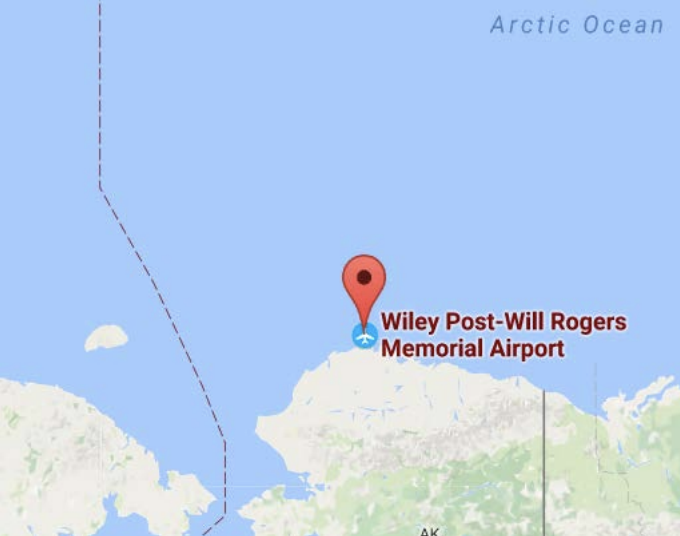

### Assumptions & Data Adjustments
- Used dataset-provided airport locations.
- Selected highest wind speed recorded per airport.
- Verified results for accuracy.

In [2]:
import pandas as pd
import requests
from io import StringIO

# Fetch airport data
url_airports = "https://raw.githubusercontent.com/hadley/nycflights13/master/data-raw/airports.csv"
airports = pd.read_csv(StringIO(requests.get(url_airports).text))

# Fetch weather data
url_weather = "https://raw.githubusercontent.com/hadley/nycflights13/master/data-raw/weather.csv"
weather = pd.read_csv(StringIO(requests.get(url_weather).text))

# Get top 5 northernmost and easternmost airports
northernmost_airports = airports.nlargest(5, 'lat')[['name', 'faa', 'lat']]
easternmost_airports = airports.nsmallest(5, 'lon')[['name', 'faa', 'lon']]

# Filter weather data for February 12, 2013
nyc_airports = ["JFK", "LGA", "EWR"]
weather_feb12 = weather[(weather['year'] == 2013) & (weather['month'] == 2) & (weather['day'] == 12)]

# Identify the windiest NYC airport on that day
windiest_nyc_airport = weather_feb12[weather_feb12['origin'].isin(nyc_airports)]\
    .groupby('origin')['wind_speed'].max().idxmax()


ModuleNotFoundError: No module named 'requests'

In [ ]:
# Display results as tables
print("\nTop 5 Northernmost Airports:")
print(northernmost_airports.to_string(index=False))

print("\nTop 5 Easternmost Airports:")
print(easternmost_airports.to_string(index=False))

print("\nWindiest NYC-area Airport on Feb 12, 2013: " + windiest_nyc_airport)
